/tmp/ipython-input-1-2480289820.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


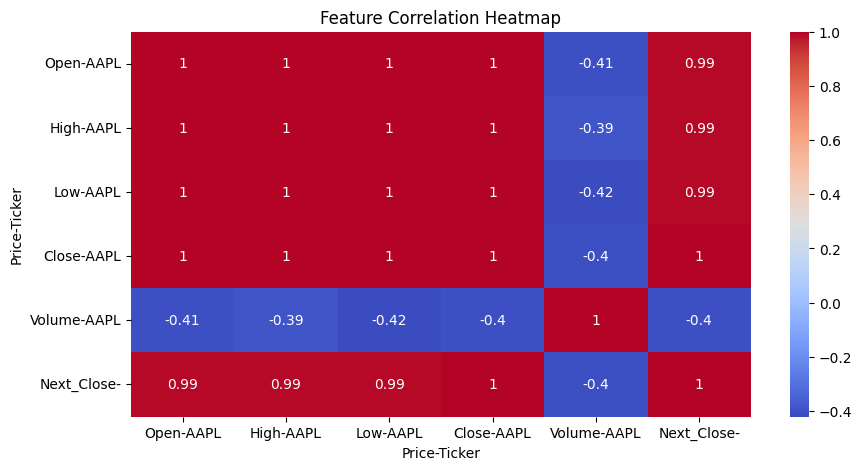

📊 Linear Regression:
R² Score: 0.9291534151861892
RMSE: 3.7676123241366253

🌲 Random Forest:
R² Score: -4.422123530146497
RMSE: 32.960322531930686


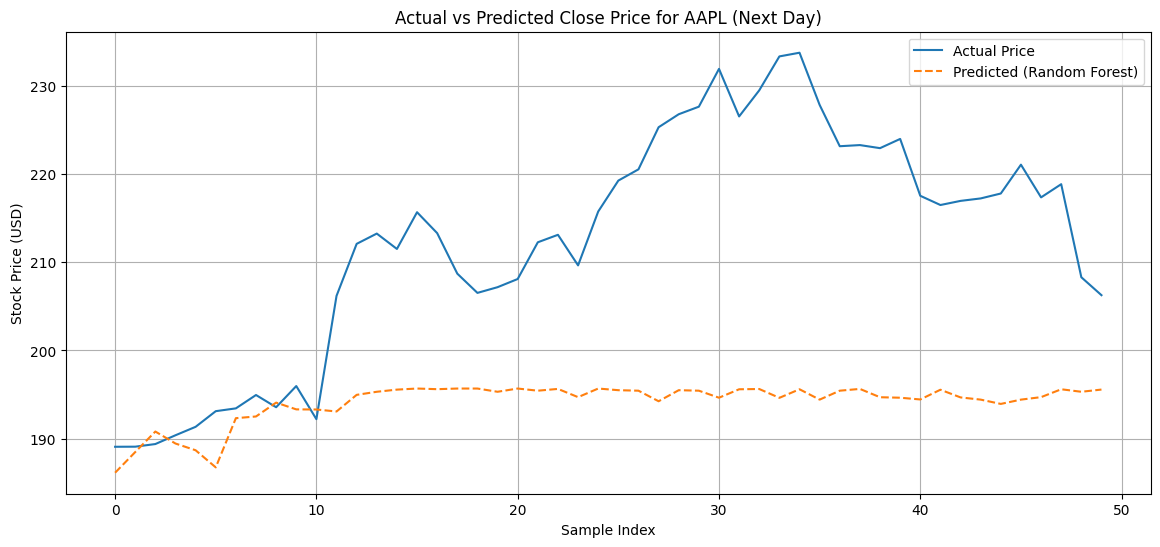

In [ ]:
# ===============================
# Step 1: Install Required Libraries
# ===============================
!pip install yfinance --quiet

# ===============================
# Step 2: Import Libraries
# ===============================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ===============================
# Step 3: Download Stock Data
# ===============================
# You can change the ticker to 'TSLA', 'MSFT', etc.
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
data.reset_index(inplace=True)

# ===============================
# Step 4: Data Preprocessing
# ===============================
# Keep only required columns
df = data[['Open', 'High', 'Low', 'Close', 'Volume']]
df['Next_Close'] = df['Close'].shift(-1)  # Next day's Close
df.dropna(inplace=True)  # Remove last row with NaN in Next_Close

# ===============================
# Step 5: Exploratory Data Analysis (Optional but Recommended)
# ===============================
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ===============================
# Step 6: Model Training
# ===============================
# Features and Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# Split into training and testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# ===============================
# Step 7: Predictions
# ===============================
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# ===============================
# Step 8: Model Evaluation
# ===============================
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\n Random Forest:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# ===============================
# Step 9: Visualize Predictions
# ===============================
plt.figure(figsize=(14,6))
plt.plot(y_test.values[:50], label='Actual Price')
plt.plot(y_pred_rf[:50], label='Predicted (Random Forest)', linestyle='--')
plt.title(f'Actual vs Predicted Close Price for {ticker} (Next Day)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


✅ Shape of dataset: (150, 5)
✅ Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

🔍 First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



🧠 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

📈 Descriptive Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



📊 Pairplot showing feature relationships:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


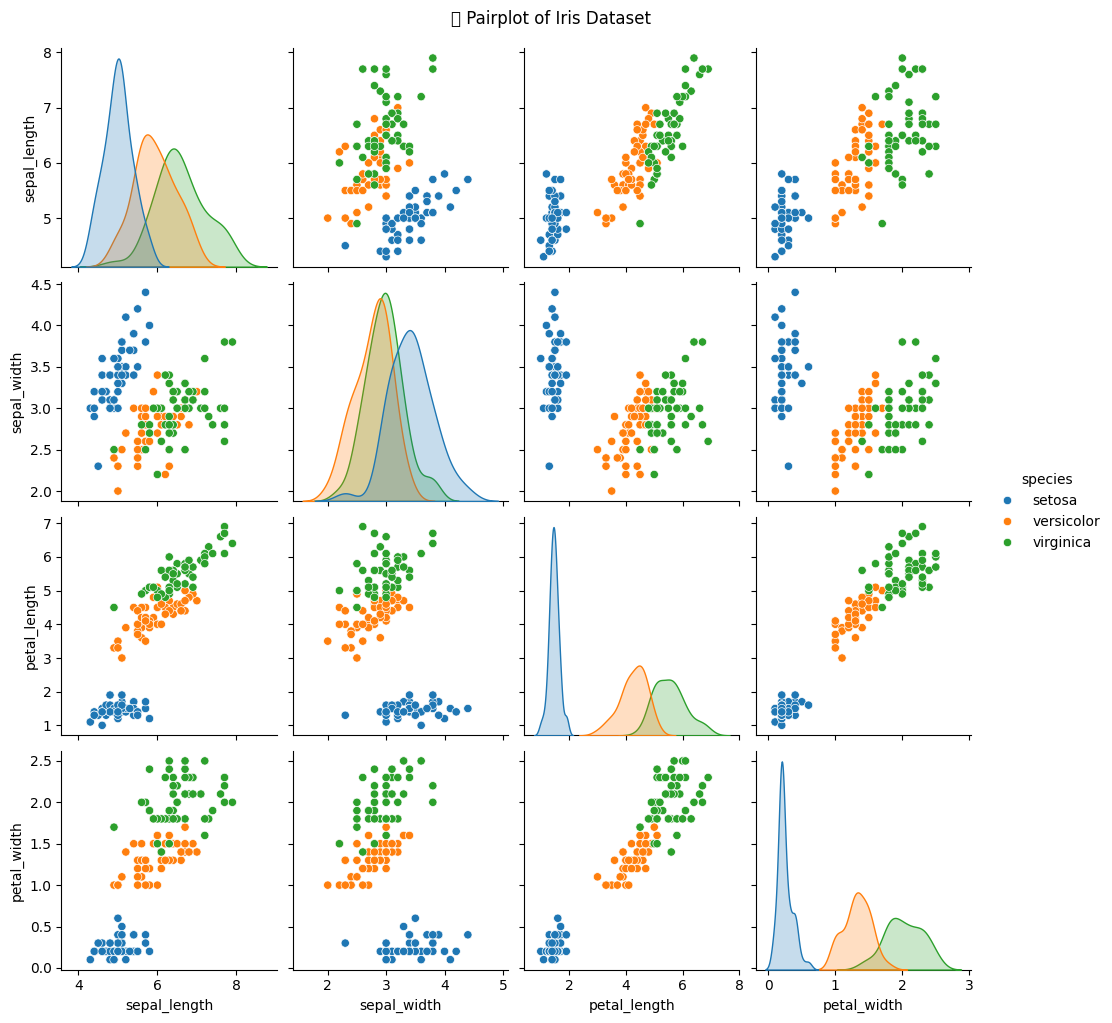

📊 Histograms of each feature:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


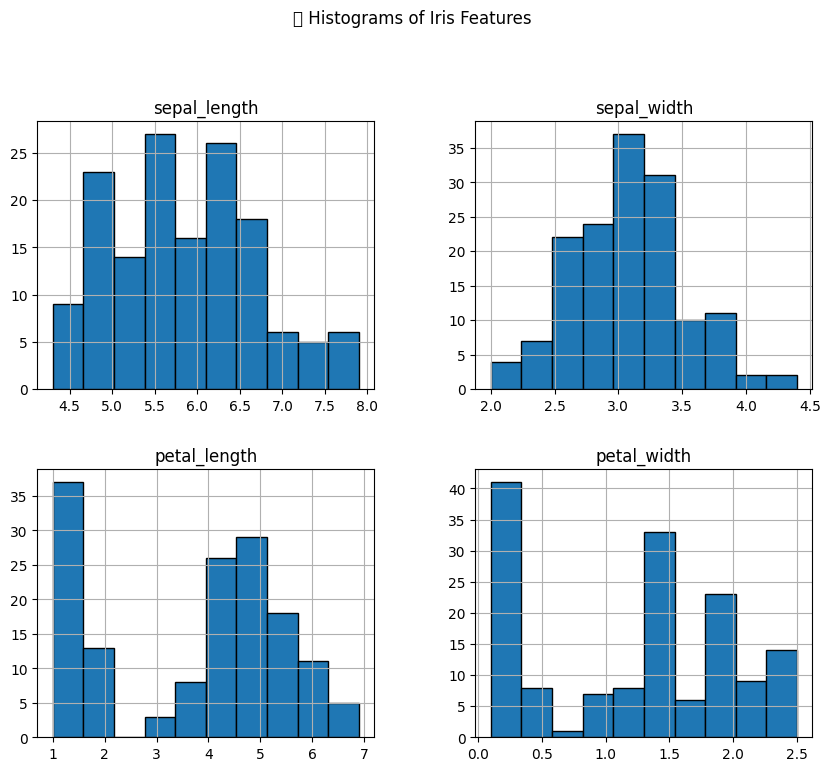

📦 Boxplot for outlier detection:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


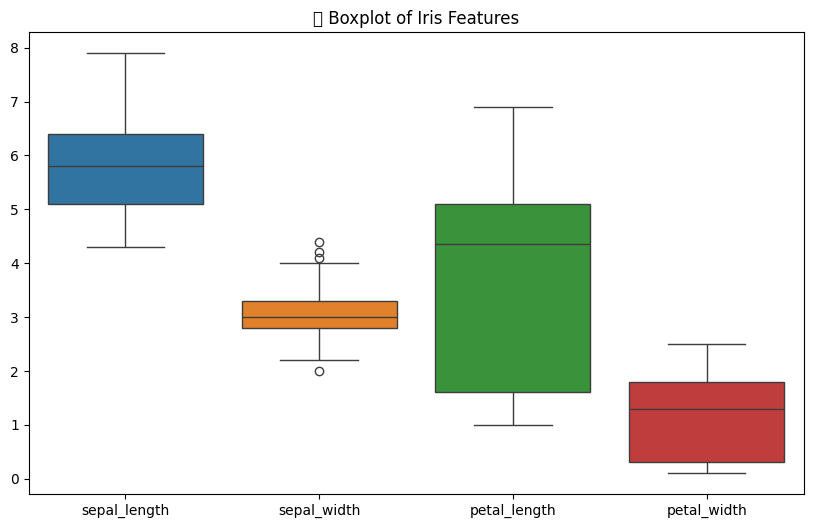

'\n### ✅ Summary:\n- The dataset contains 150 samples and 5 columns (4 features + species).\n- No missing values found.\n- Visualizations show clear differences between flower species.\n- Petal length and petal width are especially useful for classifying species.\n'

In [ ]:
# -----------------------------------------------
# Task 1: Exploring and Visualizing the Iris Dataset
# AI/ML Engineering Internship - DevelopersHub
# -----------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Iris dataset (comes with seaborn)
iris = sns.load_dataset('iris')

# Step 3: Display basic dataset info
print("Shape of dataset:", iris.shape)
print("Column names:", iris.columns.tolist())
print("\n First 5 rows:")
display(iris.head())

# Step 4: Summary statistics
print("\n Dataset Info:")
iris.info()

print("\n Descriptive Statistics:")
display(iris.describe())

# Step 5: Visualize relationships between features (scatter plots)
print("\n Pairplot showing feature relationships:")
sns.pairplot(iris, hue='species')
plt.suptitle(" Pairplot of Iris Dataset", y=1.02)
plt.show()

# Step 6: Plot histograms to see value distributions
print(" Histograms of each feature:")
iris.hist(edgecolor='black', figsize=(10, 8))
plt.suptitle(" Histograms of Iris Features", y=1.02)
plt.show()

# Step 7: Box plots to detect outliers
print(" Boxplot for outlier detection:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris)
plt.title(" Boxplot of Iris Features")
plt.show()

# Step 8: Conclusion (Markdown Cell in Colab)
# You can add this as a Text Cell in your notebook:
'''
### Summary:
- The dataset contains 150 samples and 5 columns (4 features + species).
- No missing values found.
- Visualizations show clear differences between flower species.
- Petal length and petal width are especially useful for classifying species.
'''
